<h1 style="width:750px">Airbnb and the Prevalence of Ghost Hotels in London</h1>

---

| CASA0013 | Introduction to Programming for Spatial Analysts | 
|----|----|
| Programme | MSc Smart Cities and Urban Analytics |
| Bartlett | Centre for Advanced Spatial Analytics |
| Word Count | 2,500 |
| Student ID | 19140941 |
| Date | 21-01-13 |

---

## Part 1 - Reproducible Analysis

Data for this analysis was downloaded from the Inside Airbnb website at http://insideairbnb.com/get-the-data.html.

| | | | |
|----|----|----|----|
|  09 August, 2019  |  London  |  listings.csv.gz  |  Detailed Listings data for London  |

**Note:** With a filesize of 318 MB, the original .csv file was too large for GitHub to upload. Consequently, as only 9 of the 106 original columns were used in this analysis, a .csv file (19-08_ab_london.csv) containing only these 9 columns can be downloaded from GitHub at https://github.com/MattKavanaugh/I2P-Exec-Briefing. The original code used to remove the 97 other columns has been left in the reproducible analysis code below (see "Clean"), but hashed out so it does not run.

### Load

In [64]:
#Load libraries

import pandas as pd
import geopandas as gpd
import json
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [26]:
#Load data
#The orginal data set had 106 columns, the code below will only read the reduced file containing 9 columns
#The original code would have read airbnb1 = pd.read_csv('listings.csv')

airbnb2 = pd.read_csv('19-08_ab_london.csv',encoding = "Latin-1")
airbnb2.head()

,id,host_id,host_about,host_neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type
0,32722203,2697,"37 years old from France. Living with my wife,...",LB of Islington,Islington,51.55416,-0.10358,Apartment,Entire home/apt
1,32722192,4775,Hi\r\n\r\nI expect you'd like to know somethin...,St. Luke's,Islington,51.52603,-0.08835,Apartment,Private room
2,35913421,4775,Hi\r\n\r\nI expect you'd like to know somethin...,St. Luke's,Islington,51.52605,-0.08856,Apartment,Private room
3,32191740,4775,Hi\r\n\r\nI expect you'd like to know somethin...,St. Luke's,Islington,51.52517,-0.08842,Apartment,Private room
4,15267243,4775,Hi\r\n\r\nI expect you'd like to know somethin...,St. Luke's,Islington,51.52603,-0.08909,Apartment,Entire home/apt


#### Review

In [27]:
#Check number of rows and number of columns
airbnb2.shape

(85918, 9)

In [28]:
#Check data type of every column
airbnb2.dtypes

id                          int64
host_id                     int64
host_about                 object
host_neighbourhood         object
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
dtype: object

In [31]:
#Check counts of every column
airbnb2.count()

id                        85918
host_id                   85918
host_about                49399
host_neighbourhood        66720
neighbourhood_cleansed    85918
latitude                  85918
longitude                 85918
property_type             85918
room_type                 85918
dtype: int64

### Clean

In [39]:
#Create a new dataframe containing only the columns needed for analysis
#The following two lines of code deliberately hashed out - see note at beginning of this section

#airbnb1 = pd.read_csv('listings.csv')
#airbnb2 = airbnb1.loc[:, ['id', 'host_id', 'host_about', 'host_neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type']]
#airbnb2.head()

In [40]:
#Check for missing values and compare to counts
airbnb2.isnull().sum()

id                            0
host_id                       0
host_about                36519
host_neighbourhood        19198
neighbourhood_cleansed        0
latitude                      0
longitude                     0
property_type                 0
room_type                     0
dtype: int64

In [52]:
#Replace missing values in 'host_about' column with "Unknown"
airbnb2.host_about.fillna("Unknown")

0        37 years old from France. Living with my wife,...
1        Hi\r\n\r\nI expect you'd like to know somethin...
2        Hi\r\n\r\nI expect you'd like to know somethin...
3        Hi\r\n\r\nI expect you'd like to know somethin...
4        Hi\r\n\r\nI expect you'd like to know somethin...
                               ...                        
85913                                              Unknown
85914                                              Unknown
85915                                              Unknown
85916    Hi I'm Rosi! \nI've grown up in sunny Brasil, ...
85917                                              Unknown
Name: host_about, Length: 85918, dtype: object

In [53]:
#Replace missing values in 'host_neighbourhood' column with "Unknown"
airbnb2.host_neighbourhood.fillna("Unknown")

0        LB of Islington
1             St. Luke's
2             St. Luke's
3             St. Luke's
4             St. Luke's
              ...       
85913       Canning Town
85914     LB of Haringey
85915         Grove Park
85916             Putney
85917      LB of Croydon
Name: host_neighbourhood, Length: 85918, dtype: object

### Explore and Analyze

##### How many Airbnb listings in London are not the primary residence of the host?

In [ ]:
H) Room type details from London FIGURE

#Setting up the color pallete
color_dict = {'Private room': '#cc5a49', 'Entire home/apt' : '#4586ac', 'Shared room' : '#21908d', 'Hotel room' : '#C0C0C0' }

#Group the room type using 'neighbourhood_group' as an index
airbnb2_types=airbnb2.groupby(['neighbourhood_group', 'room_type']).size()

#Create function to plot room type proportion on all region area
for region in airbnb.neighbourhood_group.unique():
    
    plt.figure(figsize=(24,12))
    
    airbnb2_reg=airbnb2_types[region]
    labels = airbnb2_reg.index
    sizes = airbnb2_reg.values
              
    colors = [color_dict[x] for x in labels]
    
    plot_num = 321
    plt.subplot(plot_num)
    reg_ch = go.Figure(data = [go.Pie(labels = labels, values = sizes, hole = 0.6)])
    reg_ch.update_traces(title = reg, marker=dict(colors=colors))
    reg_ch.show()
    
    plot_num += 1

In [ ]:
Host_neighbourhood / neighbourhood_cleansed – comparison  – where hosts live vs. listing
Of the entire, how many hosts are in the same neighbourhood

d. Listing Map London example
host_neighoburhood / neighbourhood cleansesd MAP

airbnb2['neighbourhood'].unique()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(airbnb2.neighbourhood_group.value_counts(), labels=airbnb2_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

##### How many Airbnb listings in London can be attributed to hosts with multiple listings?

[Text(0, 0, '33889201'),
 Text(1, 0, '156158778'),
 Text(2, 0, '28820321'),
 Text(3, 0, '48165024'),
 Text(4, 0, '137094377'),
 Text(5, 0, '1432477'),
 Text(6, 0, '224866971'),
 Text(7, 0, '27572615'),
 Text(8, 0, '13557337'),
 Text(9, 0, '50291093')]

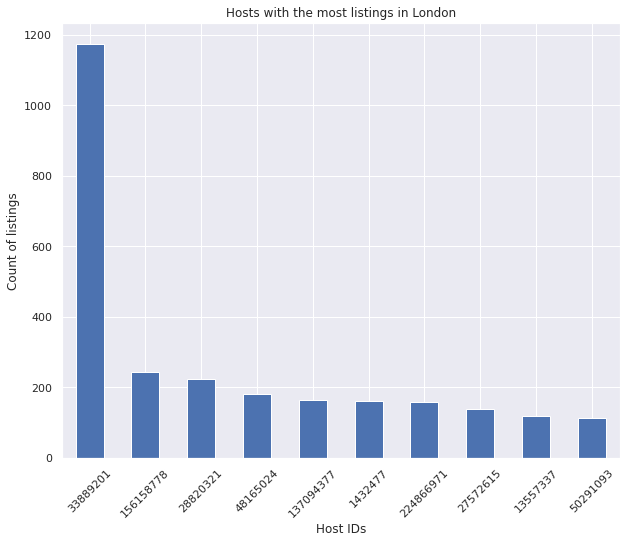

In [58]:
top_host_id = airbnb2['host_id'].value_counts().head(10)

sns.set(rc={'figure.figsize':(10,8)})

viz_bar = top_host_id.plot(kind='bar')
viz_bar.set_title('Hosts with the most listings in London')
viz_bar.set_xlabel('Host IDs')
viz_bar.set_ylabel('Count of listings')
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)

In [ ]:
#D. Differentiate prices among available room types - London

Bar chart - entire home, by host id (x), number of listings (y)
Show multiple listings that are entire home, but with same host id

airbnb2['room_type'].unique()

# 4 - Bar plot with price to location distribution
loc_price = data.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()
locations = loc_price.neighbourhood_group.unique()
x_rooms1 = [0.8, 3.8, 6.8, 9.8, 12.8]
x_rooms2 = [1.6, 4.6, 7.6, 10.6, 13.6]
x_rooms3 = [2.4, 5.4, 8.4, 11.4, 14.4]
y_values1 = loc_price[loc_price['room_type'] == 'Entire home/apt']['price'].values
y_values2 = loc_price[loc_price['room_type'] == 'Private room']['price'].values
y_values3 = loc_price[loc_price['room_type'] == 'Shared room']['price'].values
fig3,ax2 = plt.subplots(figsize=(16,11))
fig3.patch.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')
plt.bar(x_rooms1, y_values1, color='purple', edgecolor='b')
plt.bar(x_rooms2, y_values2, color='b', edgecolor='b')
plt.bar(x_rooms3, y_values3, color='yellowgreen', edgecolor='b')
ax2.set_xticks(range(1,16,3))
ax2.set_xticklabels(locations, fontsize='12')
for tick in ax2.get_xticklabels():
tick.set_rotation(45)
plt.xlabel('Location/Room-type',fontsize='15')
plt.ylabel('Prices', fontsize='15')
plt.legend(labels=loc_price.room_type.unique(), loc='best')
plt.title('London Price-Rental Distribution by Location and Room-type',fontsize='15')
plt.show()

In [ ]:
Listing id / unique host id vs. listing id / more than one host id 
multiple listings vs. unique listings – heat MAP

plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(airbnb2_df.neighbourhood_group.value_counts(), labels=airbnb2_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

##### How many Airbnb listings in London are operated by management companies?

In [ ]:
g. Top listing words example from London – but in host_about

#Crete empty list where we are going to put the name strings
names=[]
#Getting name string from 'name' column and appending it to the empty list
for name in airbnb2.name:
    names.append(name)

#Setting a function to split name strings into seperate words
def split_name(name):
    s = str(name).split()
    return s

#Create empty list where we are going to count the words
names_count = []
#Getting name string to appending it to the names_count list
for n in names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)

        
from collections import Counter
top_25 = Counter(names_count).most_common()
top_25 = top_25[:25]

word_count_data = pd.DataFrame(top_25)
word_count_data.rename(columns={0:'Words',1:'Counts'},inplace=True)
viz_count = sns.barplot(x='Words',y='Counts', data = word_count_data)
viz_count.set_title('Top 25 used words for listing names')
viz_count.set_ylabel('Count of words')
viz_count.set_xlabel('Words')
viz_count.set_xticklabels(viz_count.get_xticklabels(),rotation = 90)

##### Is the problem of 'ghost hotels' concentrated in certain areas of London or spread throughout?

In [62]:
coord = airbnb2.loc[:,['longitude','latitude']]
coord.describe()

plt.figure(figsize=(18,12))
plt.style.use('fivethirtyeight')
BBox = (-0.489, 51.28, 0.236, 51.686)
sg_map = plt.imread('map_bnw.png')
plt.imshow(sg_map,zorder=0,extent=BBox)
ax = plt.gca()
groups = airbnb2.groupby('neighbourhood_group')
for name,group in groups :
    plt.scatter(group['longitude'],group['latitude'],label=name,alpha=0.5, edgecolors='k')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: 'map_bnw.png'

<Figure size 1296x864 with 0 Axes>

In [ ]:
import folium
from folium.plugins import HeatMap
map_folium = folium.Map([1.35255,103.82580],zoom_start=11.4)
HeatMap(airbnb2[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)

---

## Part 2 - Executive Briefing

---

### 1 Executive Summary

This report provides an analysis of Airbnb activity in London based on data sourced from the Inside Airbnb website for the month of August 2019 – the last summer month prior to the COVID-19 pandemic. Through exploratory data analysis, we define what a ‘ghost hotel’ is and then set out to answer four main questions:
1. How many Airbnb listings in London are not the primary residence of the host?
2. How many Airbnb listings in London can be attributed to hosts with multiple listings?
3. How many Airbnb listings in London are operated by management companies?
4. Is the problem of ‘ghost hotels’ concentrated in certain areas of London or spread throughout?

#### Key Findings

#### Recommendations

---

### 2 Background

#### Airbnb

#### 'Ghost Hotels'

#### Inside Airbnb

---

### 3 Analysis

#### How many Airbnb listings in London are not the primary residence of the host?

#### How many Airbnb listings in London can be attributed to hosts with multiple listings? 

#### How many Airbnb listings in London are operated by management companies? 

#### Is the problem of 'ghost hotels' concentrated in certain areas of London or spread throughout?

---

### 4 Conclusion

---

### 5 References